# TASK 2:Prediction using unsupervised ML


### Predicting the optimum number of clusters and representing it visually.
### GRIP@The Sparks Foundation




# Name:Soniya Sunil Mansukh


# Subject:Data Science And Bussiness Analytics

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

## Loading iris dataset

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.shape)
iris_df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizing the dataset

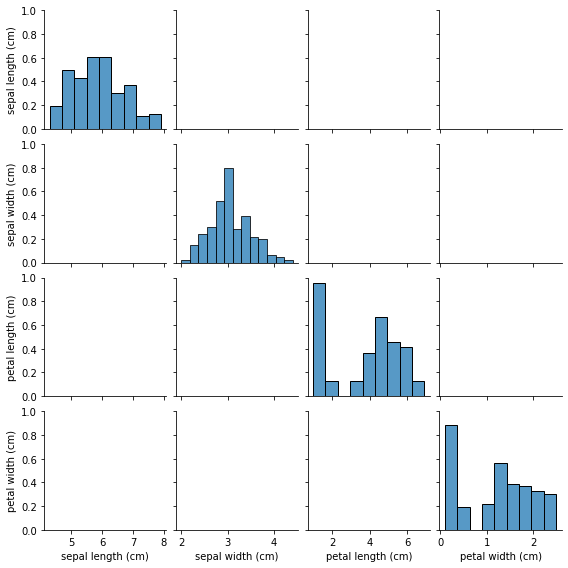

In [5]:
sns.pairplot(iris_df, height=2, kind='ticks')

## Determining optimum number of clusters for kmeans classification

In [6]:
from sklearn.cluster import KMeans
x = iris_df.iloc[:, [0, 1, 2, 3]].values

kmeans = KMeans(n_clusters=9)
kmeans.fit(x)


KMeans(n_clusters=9)

In [7]:
y_kmeans = kmeans.predict(x)

## Plotting the dataset

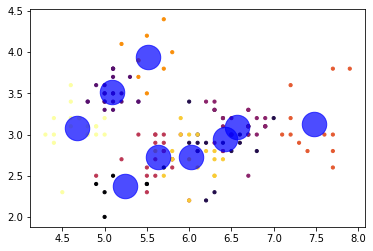

In [8]:
plt.scatter(x[:, 0],x[:, 1], c=y_kmeans, s=10, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],centers[:, 1],c='blue', s=600 , alpha=0.7);

## Predicting optimum number of cluster using elbow method

In [9]:
kmeans.inertia_

27.815557416267957

In [10]:
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(x)
    wss.append([i, kmeans.inertia_])

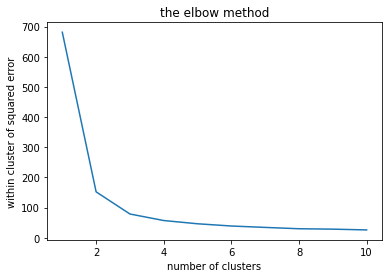

In [11]:
plt.plot(pd.DataFrame(wss)[0], pd.DataFrame(wss)[1]);
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('within cluster of squared error')
plt.show()

## Using Kmeans classifier on IRIS dataset

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300,n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visual representation of clusters with their centroids

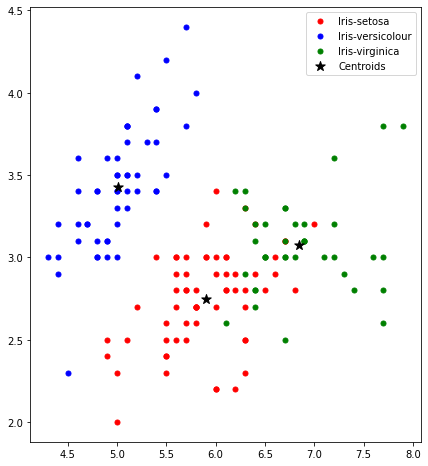

In [13]:
plt.figure(figsize=(7,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, marker='.', c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, marker='.', c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, marker='.', c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, marker='*', c = 'black', label = 'Centroids')

plt.legend()

# THANK YOU